# Lab 6: K-Nearest Neighbors

## Stuart Harley

### Introduction

kNN was one of the earliest machine learning algorithms, and while it is not widely used outside of recommendation systems (collaborative filtering) these days, it is a good introduction to the process of machine learning.

In this notebook I implement the k-nearest neighbors (kNN) algorithm for classification as a Python class using both loops and built in Numpy functionality. I then apply my implementation to some flower data to analyze the performance differences between loops and Numpy vectorized operations.

### Learning Outcomes
- kNN algorithm implementation with loops and Numpy
- Basic Machine Learning model and training structuring
- Using scipy and documentation to implement functionality
- Splitting data into training and testing sets
- Analysis of data and model generated from the data

**Importing Libraries**

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import time

from knn import KNN
from test_knn import *

**Using Matplotlib to make a scatter plot of Sepal Width v. Sepal Length**

(1.5, 4.9)

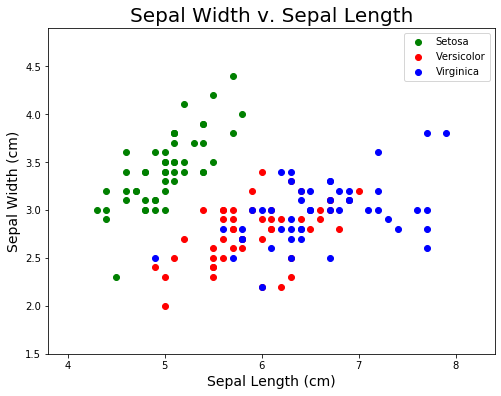

In [2]:
iris = load_iris()
x = iris.data[:,0]
y = iris.data[:,1]
x_setosa = x[0:50]
y_setosa = y[0:50]
x_versicolor = x[50:100]
y_versicolor = y[50:100]
x_virginica = x[100:150]
y_virginica = y[100:150]

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(x_setosa, y_setosa, label="Setosa", color='g')
plt.scatter(x_versicolor, y_versicolor, label="Versicolor", color='r')
plt.scatter(x_virginica, y_virginica, label="Virginica", color='b')
plt.xlabel('Sepal Length (cm)', fontsize=14)
plt.ylabel('Sepal Width (cm)', fontsize=14)
plt.title('Sepal Width v. Sepal Length', fontsize=20)
plt.legend(loc=1)

plt.xlim(3.8, 8.4)
plt.ylim(1.5, 4.9)

**Testing**: The following cell runs the tests from the test_knn class. The test_iris_classification tests should fail because there are points in the iris data set that are different flowers but have the same sepal length and width which causes classification errors.

In [3]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_blob_classification_loop (test_knn.TestKNN) ... ok
test_blob_classification_numpy (test_knn.TestKNN) ... ok
test_iris_classification_loop (test_knn.TestKNN) ... FAIL
test_iris_classification_numpy (test_knn.TestKNN) ... FAIL

FAIL: test_iris_classification_loop (test_knn.TestKNN)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/harleys/CS-2300/lab6/test_knn.py", line 111, in test_iris_classification_loop
    self.assertAlmostEqual(accuracy, 1.0)
AssertionError: 0.92 != 1.0 within 7 places (0.07999999999999996 difference)

FAIL: test_iris_classification_numpy (test_knn.TestKNN)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/harleys/CS-2300/lab6/test_knn.py", line 132, in test_iris_classification_numpy
    self.assertAlmostEqual(accuracy, 1.0)
AssertionError: 0.92 != 1.0 within 7 places (0.07999999999999996 difference)

---------------------

**Creating training/testing sets**: The solution is trained on the entire dataset, which isn’t ideal and enables overfitting, so we need to fix that.  In this cell, I divide the iris data into training and testing sets.

In [4]:
data = iris.data[:,0:2]
targets = [iris.target_names[0]]*50 + [iris.target_names[1]]*50 + [iris.target_names[2]]*50
train_X, test_X, train_y, test_y = train_test_split(data, targets, stratify = targets)

**Testing**: In this cell I use my kNN class to train only using the training dataset and classify the flowers by species using only the test dataset. I calculate the accuracy to compare the predicted labels to the known labels for the testing set. I do this for k values of 1-11. I run this cell using both the predict_loop() method and predict_numpy() method in order to compare their performance.

In [5]:
# %%time
accuracy = pd.DataFrame(index=range(6),columns=range(2))
accuracy.columns = ["k-value", "accuracy"]
knn = KNN(0)
knn.fit(train_X, train_y)
index = 0
for x in range(1,12,2):
    knn.set_k(x)
    pred_y = knn.predict_numpy(test_X)
    acc = accuracy_score(test_y, pred_y)
    accuracy.iloc[index,0] = x
    accuracy.iloc[index,1] = acc
    index += 1

**Time Benchmarking**: When running the previous cell using the predict_loop() method, it took about 420 ms to complete. Compared to using the predict_numpy() method which took about 20 ms. The difference comes from the fact that predict_numpy() is using vectorized functions on numpy arrays which are very efficient. In comparison, predict_loop() is looping through the data which takes much longer.

**Plotting the accuracy results**: Since the training and testing data changes each run through, so do the accuracy results. This is a graph of one iteration of tests that I felt represented average-ish results.

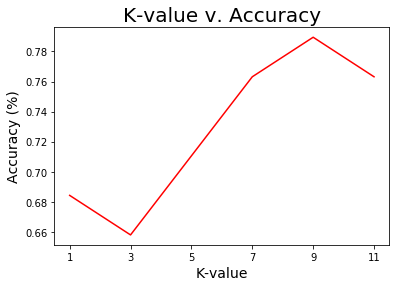

In [6]:
fig2, axes2 = plt.subplots()
axes2.plot(accuracy["k-value"],accuracy["accuracy"], "r")
axes2.set_xlabel('K-value', fontsize=14)
axes2.set_xticks(np.arange(1, 13, step=2))
axes2.set_ylabel('Accuracy (%)', fontsize=14)
axes2.set_title('K-value v. Accuracy', fontsize=20);

### Conclusion

a) Based on the scatter plot of the features, a short sepal length and longer sepal width seem to be characteristic of the setosa. The versicolor and virginica were very similar in that they both had a shorter sepal width and a longer sepal length. However, the virginica seemed to have a slighlty longer sepal length.

b) The different k-values gave different accuracy results with each iteration. However, in general, the higher k-values gave better results. I found that the k-value of 9 seemed to on average give the best results.

c) The main downside to the kNN mode is that it has a high memory requirement. To accurately classify data, you have to calculate the distance with every point in the dataset. This means the larger the datasets grow, the time to calculate increases exponentially. Also, the more memory it takes up. Today, much of classifying is done on images which take up a large amount of memory. For image recognition, it is much more efficient to use a deep learning model. As a side note, kNN doesn't actually learn anything, it just claassifies. So in order to improve the results, you have to increase the size of the dataset.